In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io as io
import pandas as pd

In [4]:
data = pd.read_csv('all_mof.csv')

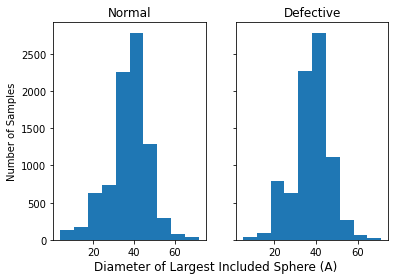

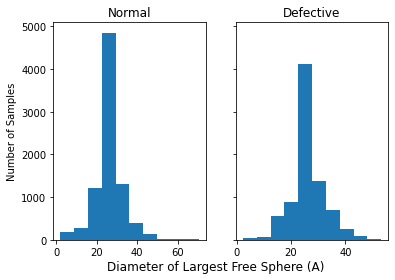

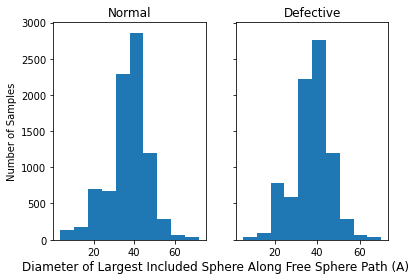

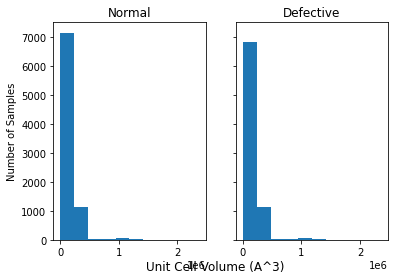

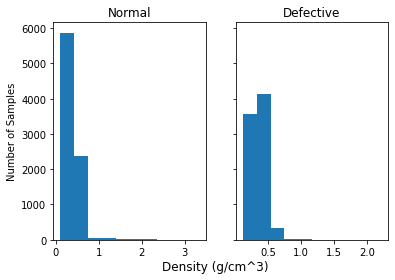

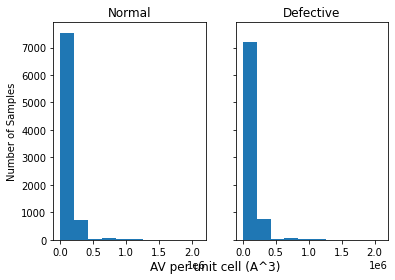

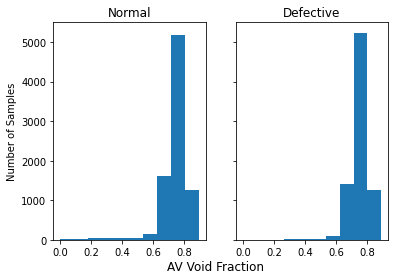

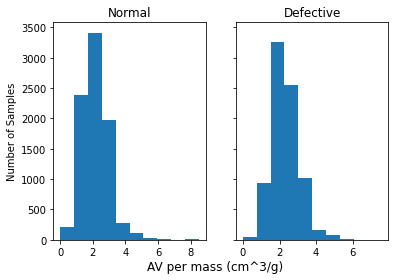

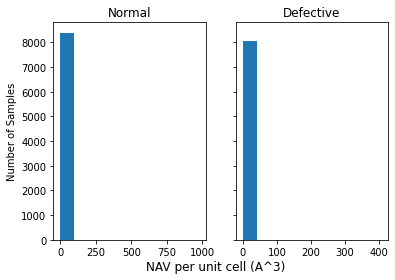

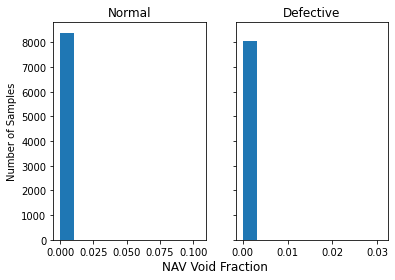

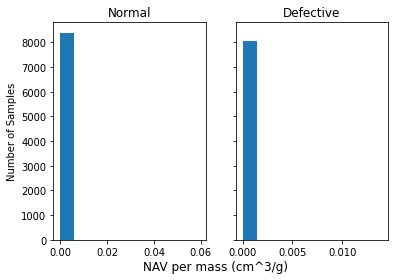

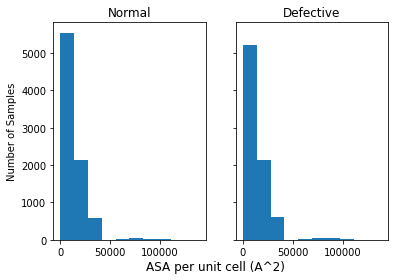

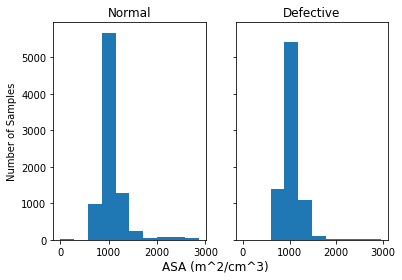

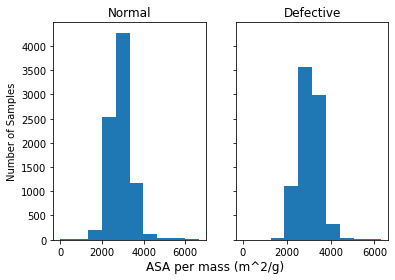

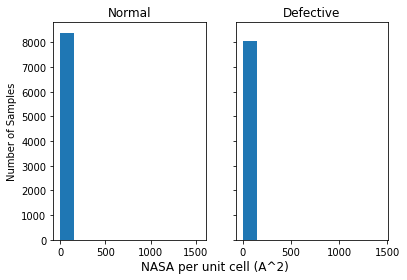

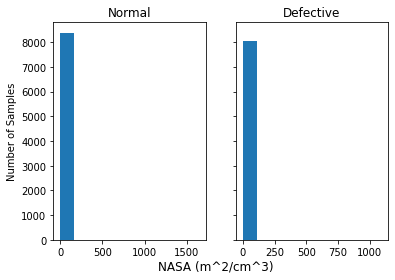

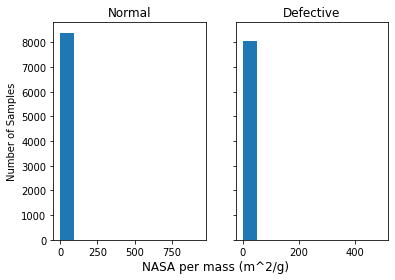

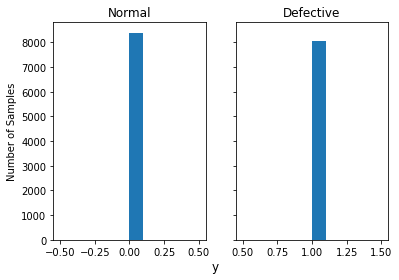

In [5]:
count = 1
for col in data.columns:
    fig, axs = plt.subplots(1, 2, sharey=True)
    name = str(count) + 'try.png'
    
    axs[0].hist(data[col][0:8394],bins = 10)
    axs[1].hist(data[col][8394:], bins = 10)
    axs[0].set_title('Normal')
    axs[1].set_title('Defective')
    axs[0].set_ylabel('Number of Samples')
    fig.supxlabel(col)
    fig.savefig(name, format='png', dpi=1200)
    count += 1


### Void Fraction

In [7]:
voldata = pd.read_csv('comparevolume.csv')

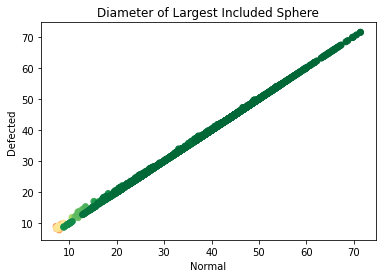

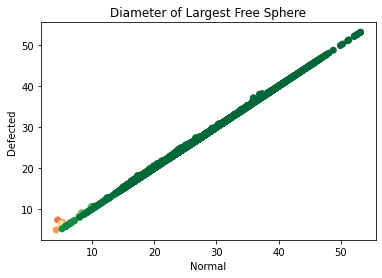

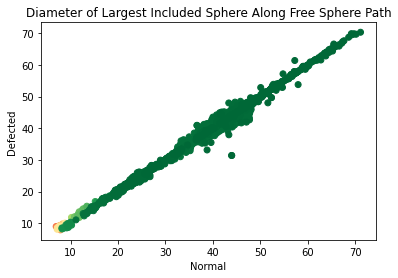

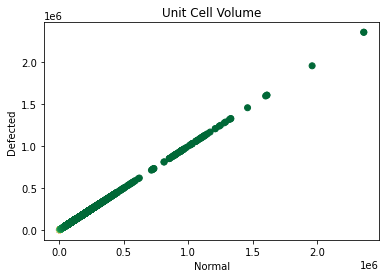

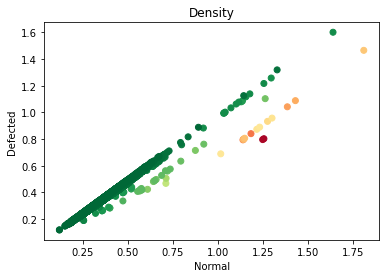

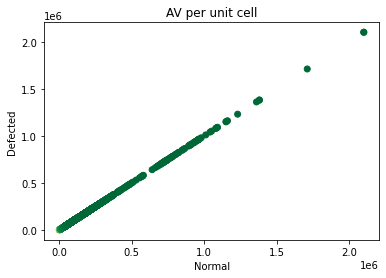

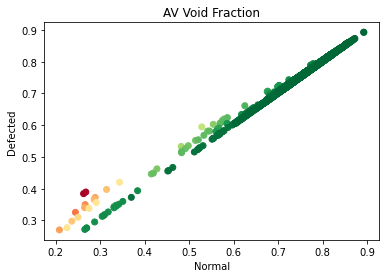

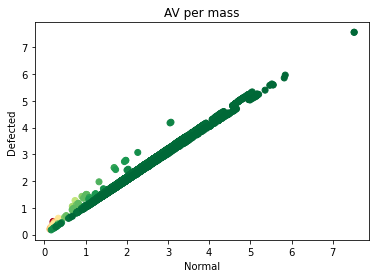

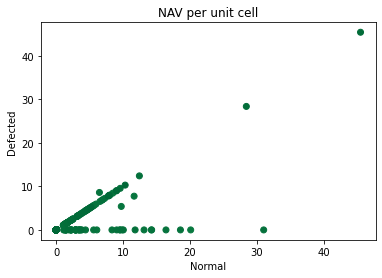

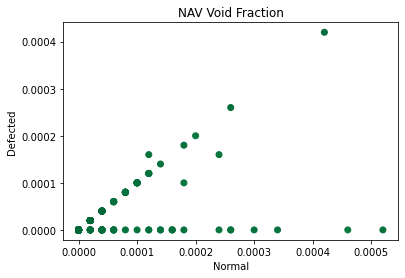

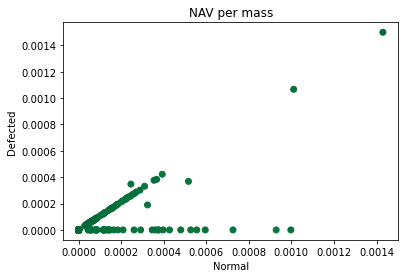

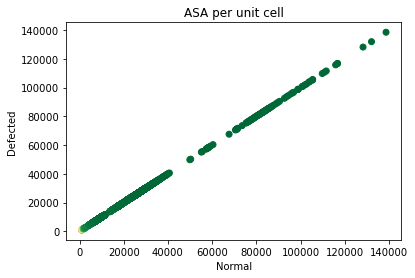

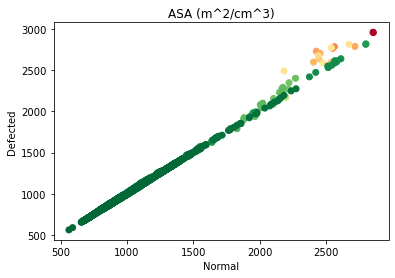

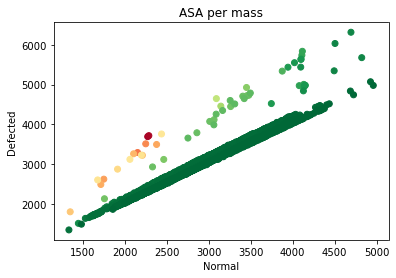

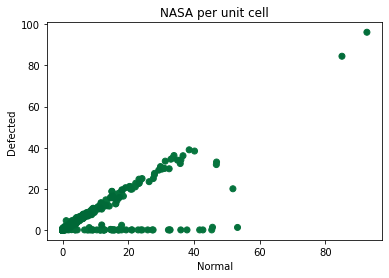

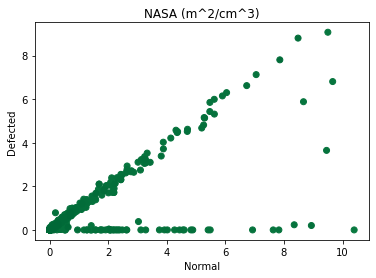

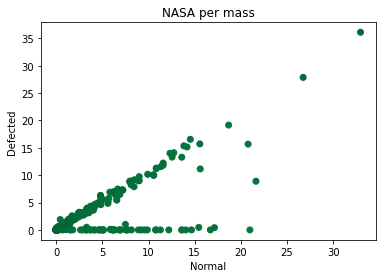

In [16]:
count = 1
while count != 18:
    plt.figure()
    plt.scatter(voldata[voldata.columns[count]][0:8058], voldata[voldata.columns[count]][8058:], c = voldata[voldata.columns[20]][8058:], cmap="RdYlGn", label = 'Normal')
    #plt.scatter(voldata[voldata.columns[count]][8058:],voldata['y'][8058:], 'ro', label = 'Defected')
    plt.xlabel('Normal')
    plt.ylabel('Defected')
    plt.title(voldata.columns[count])
    plt.show()
    count += 1

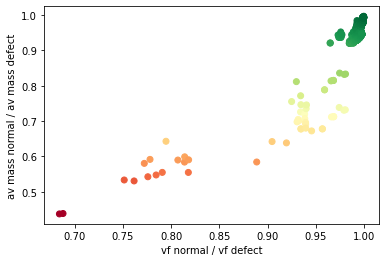

In [17]:
plt.figure()
plt.scatter(voldata[voldata.columns[20]][0:8058], voldata[voldata.columns[21]][0:8058], c = voldata[voldata.columns[21]][8058:], cmap="RdYlGn", label = 'Normal')
#plt.scatter(voldata[voldata.columns[count]][8058:],voldata['y'][8058:], 'ro', label = 'Defected')
plt.xlabel(voldata.columns[20])
plt.ylabel(voldata.columns[21])
plt.show()

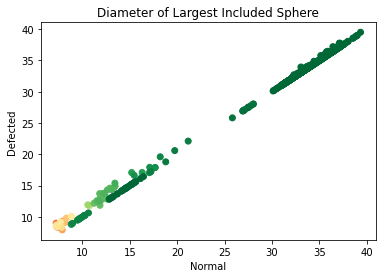

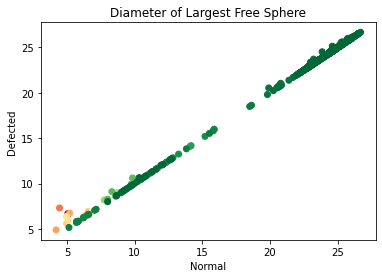

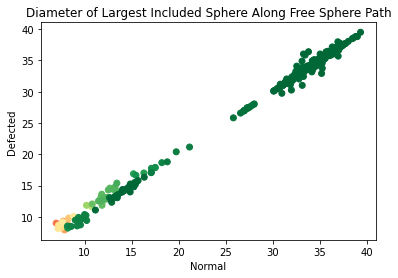

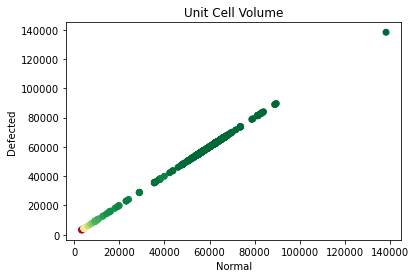

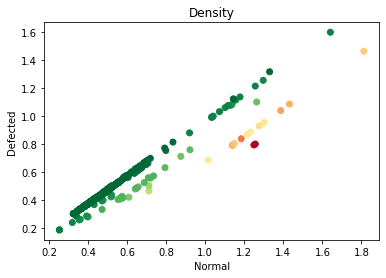

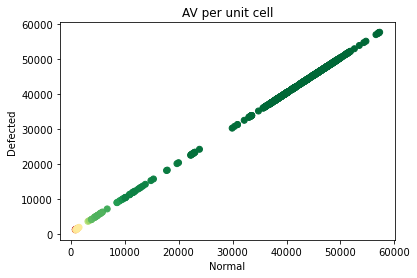

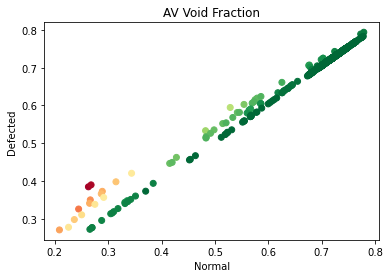

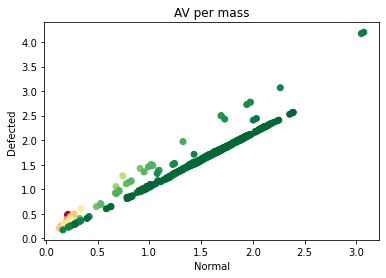

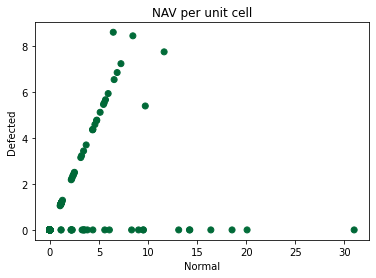

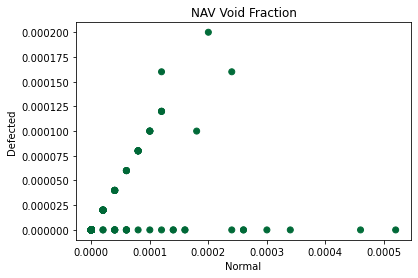

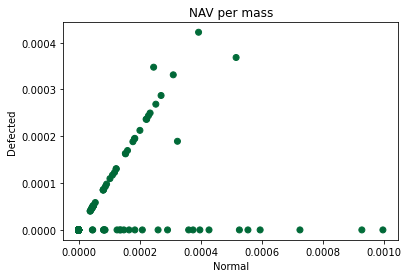

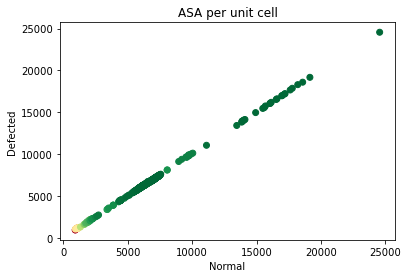

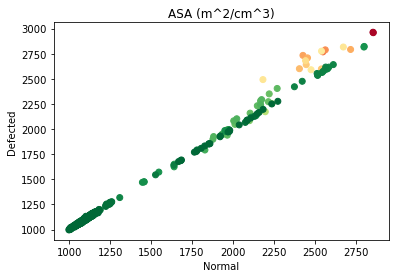

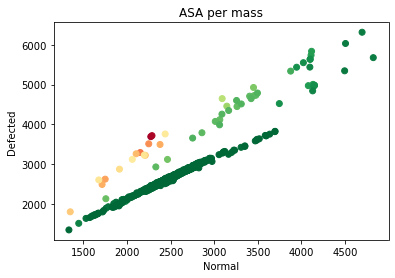

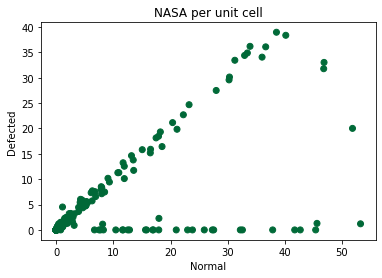

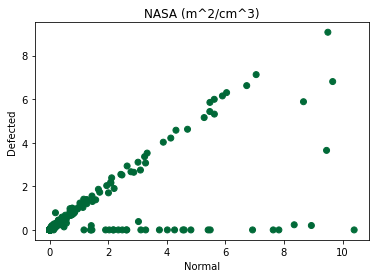

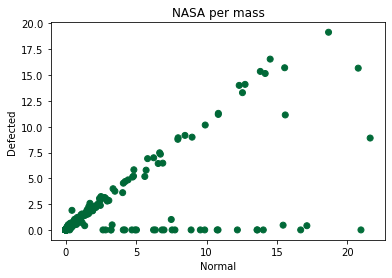

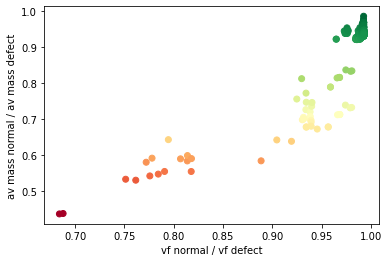

In [18]:
count = 1
while count != 18:
    plt.figure()
    plt.scatter(voldata[voldata.columns[count]][0:1000], voldata[voldata.columns[count]][8058:8058+1000], c = voldata[voldata.columns[20]][0:1000], cmap="RdYlGn", label = 'Normal')
    #plt.scatter(voldata[voldata.columns[count]][8058:],voldata['y'][8058:], 'ro', label = 'Defected')
    plt.xlabel('Normal')
    plt.ylabel('Defected')
    plt.title(voldata.columns[count])
    plt.show()
    count += 1
    
plt.figure()
plt.scatter(voldata[voldata.columns[20]][0:1000], voldata[voldata.columns[21]][0:1000], c = voldata[voldata.columns[21]][0:1000], cmap="RdYlGn", label = 'Normal')
#plt.scatter(voldata[voldata.columns[count]][8058:],voldata['y'][8058:], 'ro', label = 'Defected')
plt.xlabel(voldata.columns[20])
plt.ylabel(voldata.columns[21])
plt.ylabel(voldata.columns[21])
plt.show()

In [16]:
import scipy.io as io
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [17]:
cpca = 0
def pca_run(X, y, fig = True):
    count = 0
    norm = []
    anom = []
    for i in y:
        if i == 0:
            norm.append(count)
        else:
            anom.append(count)
        count += 1
    
    pca = PCA(n_components=2)
    X_new = pca.fit_transform(X)
    
    
    if fig:
        f = plt.figure()
        name = 'pca' + str(random.randint(100,200)) + '.png'
        plt.plot(X_new[norm, 0], X_new[norm, 1], 'bo', label = 'Normal')
        plt.plot(X_new[anom, 0], X_new[anom, 1], 'r*', label = 'Anomaly')
        plt.legend()
        plt.ylabel('PCA Component 2')
        plt.xlabel('PCA Component 1')
        plt.show()
        f.savefig(name, bbox_inches = 'tight', format='png', dpi=1200)
        
        



    #return X_new

In [18]:
def pca_mle(X, y, fig = True):
    count = 0
    norm = []
    anom = []
    for i in y:
        if i == 0:
            norm.append(count)
        else:
            anom.append(count)
        count += 1
    
    pca = PCA(n_components='mle')
    X_new = pca.fit_transform(X)
    
    if fig:
        plt.plot(X_new[norm, 0], X_new[norm, 1], 'bo', label = 'Normal')
        plt.plot(X_new[anom, 0], X_new[anom, 1], 'r*', label = 'Anomaly')
        plt.legend()
        plt.ylabel('PCA Component 2')
        plt.xlabel('PCA Component 1')
        plt.show()

    return X_new, y

In [19]:
def cy(y):
    newy = y.copy()
    newy = newy.astype('int32')
    newy[np.argwhere(y == 1)] = -1
    newy[np.argwhere(y == 0)] = int(1)
    newy = newy.flatten()
    newy = newy.flatten()
    return newy

In [20]:
X = np.concatenate((voldata[voldata.columns[1:18]].values[0:5000],voldata[voldata.columns[1:18]].values[8058:8058+5000]), axis=0)
y = np.concatenate((voldata[voldata.columns[18]].values[0:5000],voldata[voldata.columns[18]].values[8058:8058+5000]), axis=0)

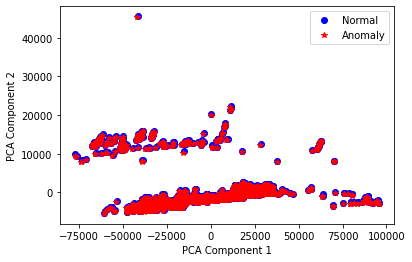

In [21]:
pca_run(X, y)


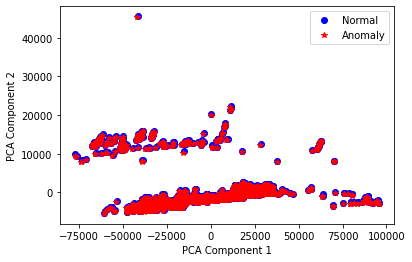

In [22]:
Xvall = pca_mle(X,y)

half the graph is 82 points lol (least percentage of defects, largest unit cell volumes)

In [23]:
X = np.concatenate((voldata[voldata.columns[1:18]].values[0:8058],voldata[voldata.columns[1:18]].values[8058+7976:]), axis=0)
y = np.concatenate((voldata[voldata.columns[18]].values[0:8058],voldata[voldata.columns[18]].values[8058+7976:]), axis=0)

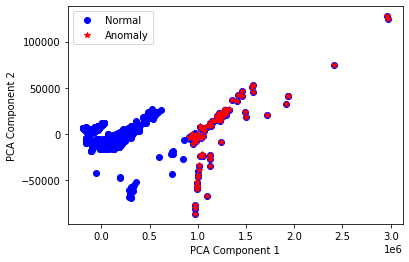

In [24]:
pca_run(X, y)

In [25]:
X = np.concatenate((voldata[voldata.columns[1:18]].values[0:8058-78],voldata[voldata.columns[1:18]].values[8058:8058+5000]), axis=0)
y = np.concatenate((voldata[voldata.columns[18]].values[0:8058-78],voldata[voldata.columns[18]].values[8058:8058+5000]), axis=0)

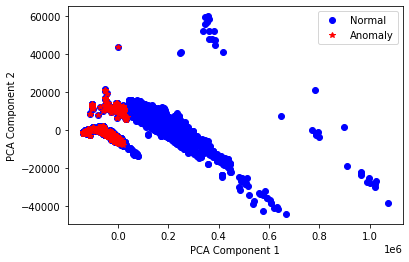

In [26]:
pca_run(X, y)

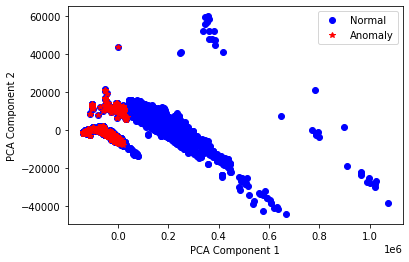

In [27]:
Xvlow = pca_mle(X,y)

### AV by Mass

In [28]:
vmdata = pd.read_csv('comparevolmass.csv')

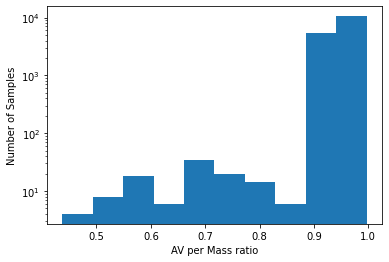

In [29]:
f = plt.figure()
plt.hist(vmdata[vmdata.columns[21][:]],bins = 10, log = True)
plt.ylabel('Number of Samples')
plt.xlabel('AV per Mass ratio')
plt.show()
f.savefig('avmassdist.png', format = 'png', dpi = 1200)

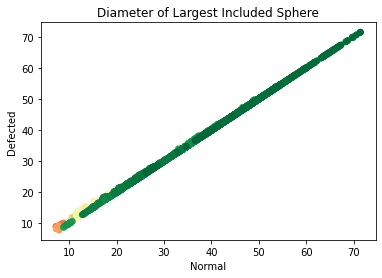

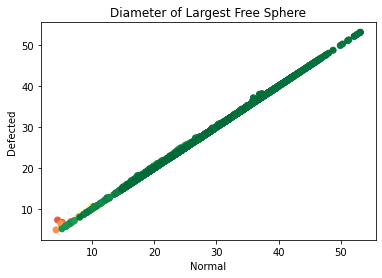

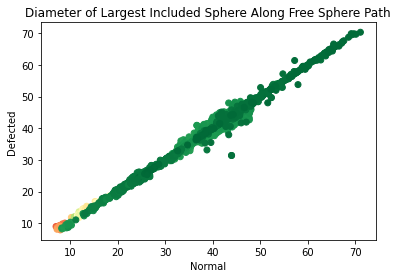

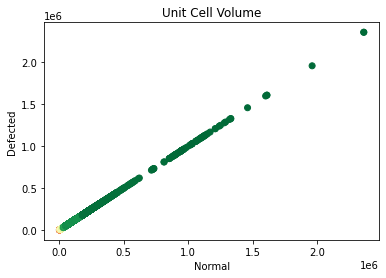

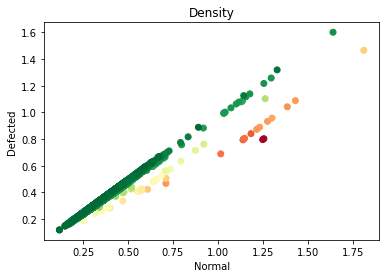

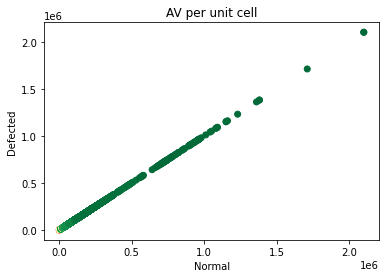

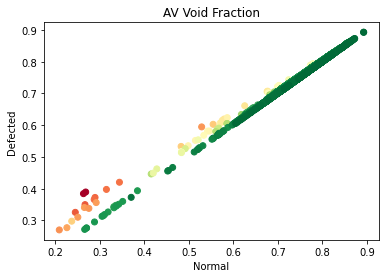

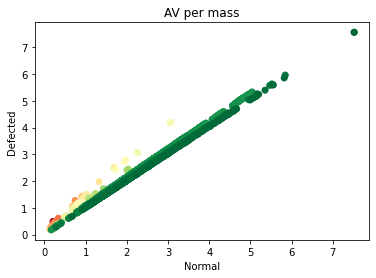

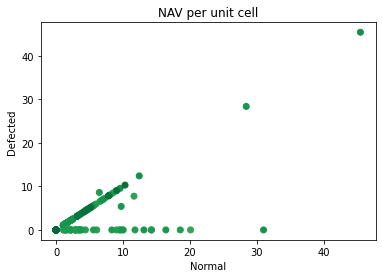

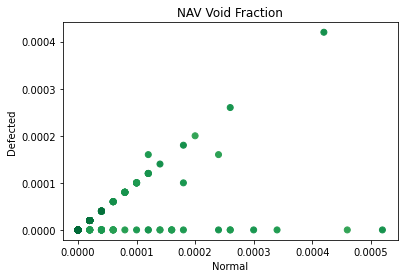

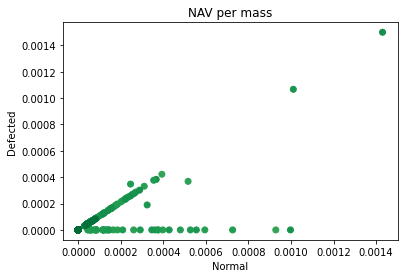

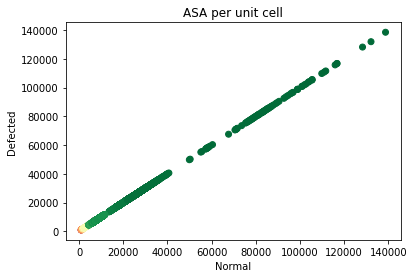

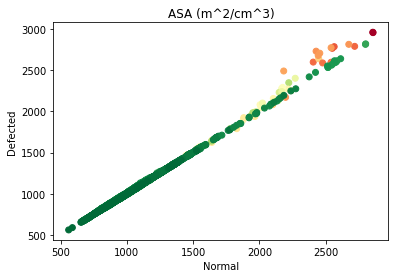

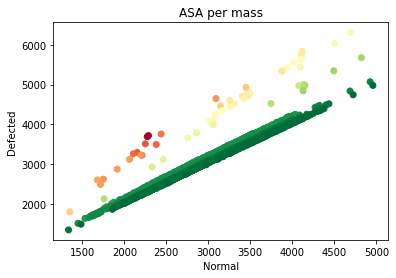

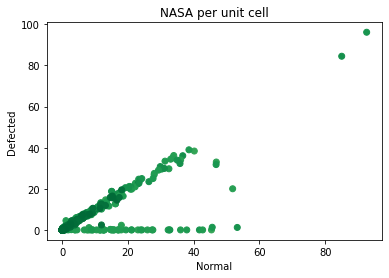

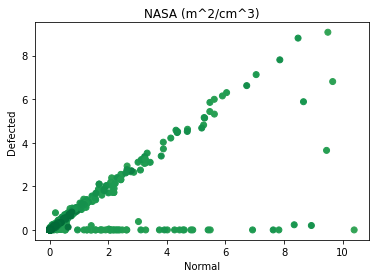

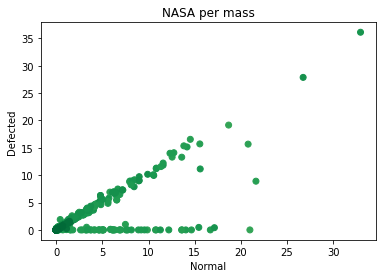

In [30]:
count = 1
while count != 18:
    plt.figure()
    plt.scatter(voldata[voldata.columns[count]][0:8058], voldata[voldata.columns[count]][8058:], c = voldata[voldata.columns[21]][8058:], cmap="RdYlGn", label = 'Normal')
    #plt.scatter(voldata[voldata.columns[count]][8058:],voldata['y'][8058:], 'ro', label = 'Defected')
    plt.xlabel('Normal')
    plt.ylabel('Defected')
    plt.title(voldata.columns[count])
    plt.show()
    count += 1

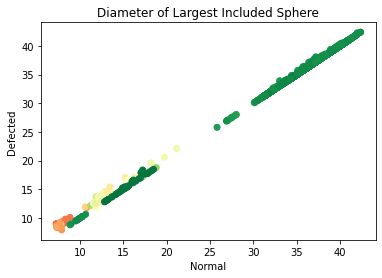

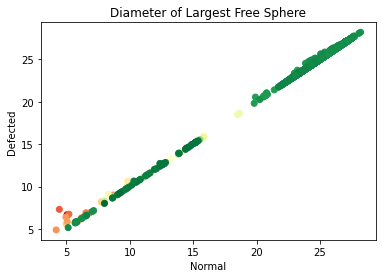

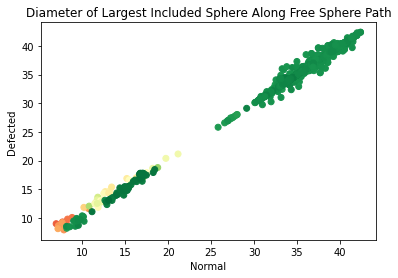

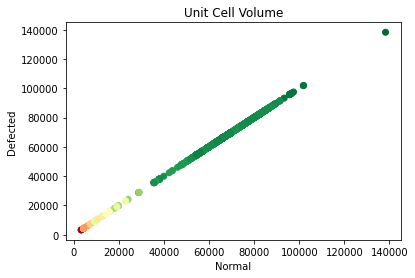

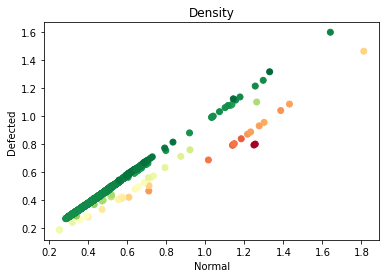

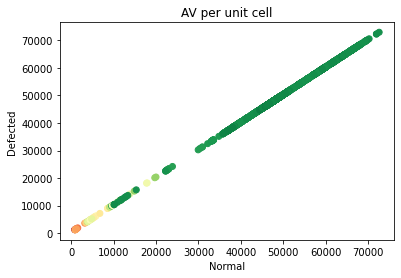

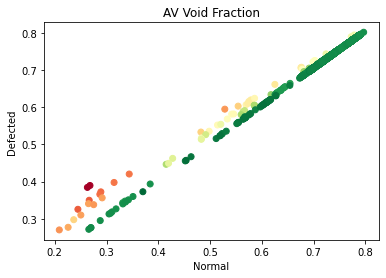

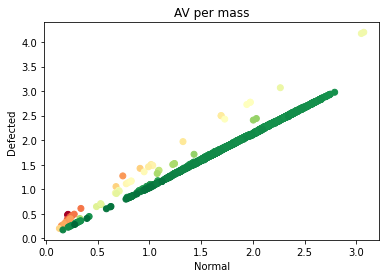

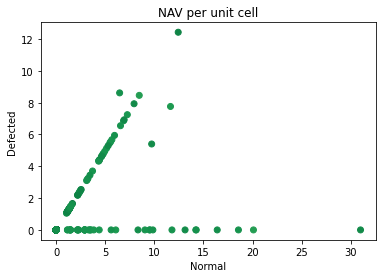

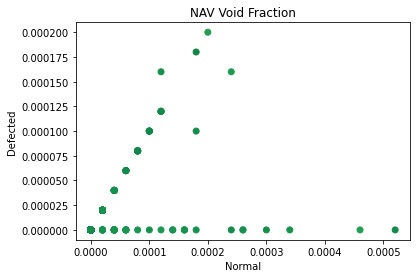

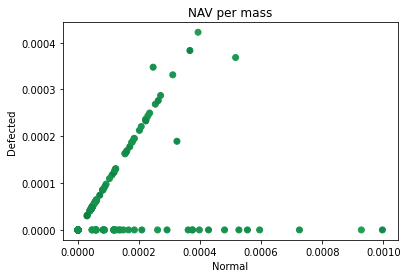

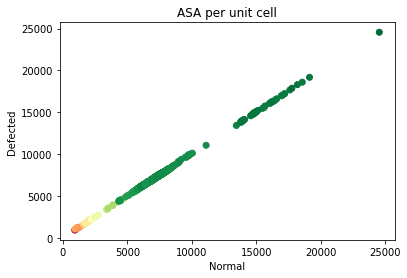

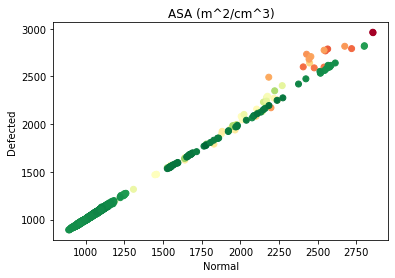

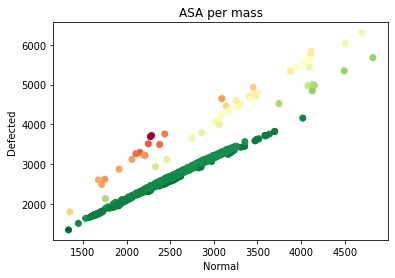

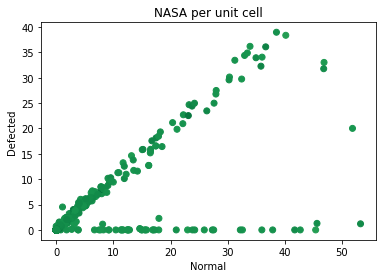

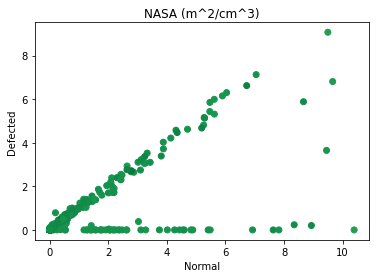

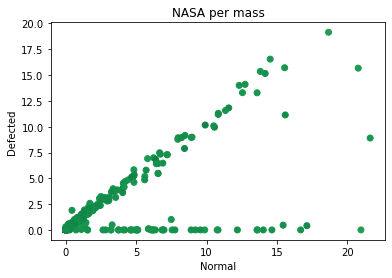

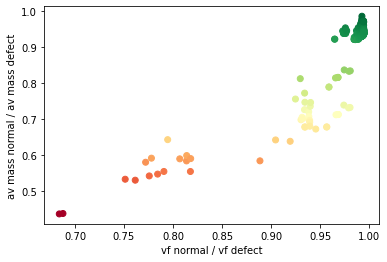

In [31]:
count = 1
while count != 18:
    plt.figure()
    plt.scatter(voldata[voldata.columns[count]][0:3000], voldata[voldata.columns[count]][8058:8058+3000], c = voldata[voldata.columns[21]][0:3000], cmap="RdYlGn", label = 'Normal')
    #plt.scatter(voldata[voldata.columns[count]][8058:],voldata['y'][8058:], 'ro', label = 'Defected')
    plt.xlabel('Normal')
    plt.ylabel('Defected')
    plt.title(voldata.columns[count])
    plt.show()
    count += 1
    
plt.figure()
plt.scatter(voldata[voldata.columns[20]][0:3000], voldata[voldata.columns[21]][0:3000], c = voldata[voldata.columns[21]][0:3000], cmap="RdYlGn", label = 'Normal')
#plt.scatter(voldata[voldata.columns[count]][8058:],voldata['y'][8058:], 'ro', label = 'Defected')
plt.xlabel(voldata.columns[20])
plt.ylabel(voldata.columns[21])
plt.ylabel(voldata.columns[21])
plt.show()

In [32]:
X = np.concatenate((vmdata[vmdata.columns[1:18]].values[0:8058],vmdata[vmdata.columns[1:18]].values[8058:]), axis=0)
y = np.concatenate((vmdata[vmdata.columns[18]].values[0:8058],vmdata[vmdata.columns[18]].values[8058:]), axis=0)

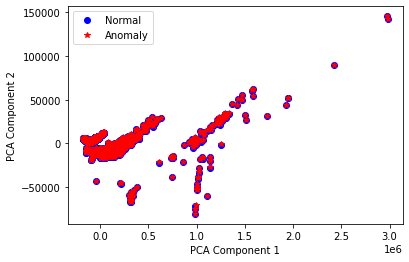

In [33]:
pca_run(X, y)

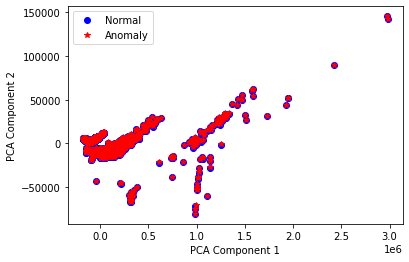

In [34]:
X1, y1 = pca_mle(X,y)

In [35]:
X = np.concatenate((vmdata[vmdata.columns[1:18]].values[0:8058],vmdata[vmdata.columns[1:18]].values[8058+7945:]), axis=0)
y = np.concatenate((vmdata[vmdata.columns[18]].values[0:8058],vmdata[vmdata.columns[18]].values[8058+7945:]), axis=0)

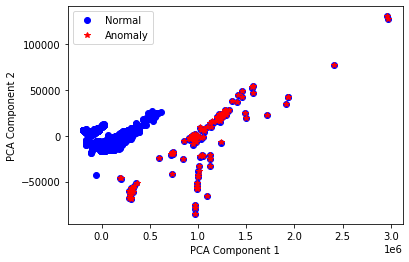

In [36]:
pca_run(X, y)

In [37]:
X = np.concatenate((vmdata[vmdata.columns[1:18]].values[0:8058],vmdata[vmdata.columns[1:18]].values[8058+5225:8058+7945]), axis=0)
y = np.concatenate((vmdata[vmdata.columns[18]].values[0:8058],vmdata[vmdata.columns[18]].values[8058+5225:8058+7945]), axis=0)

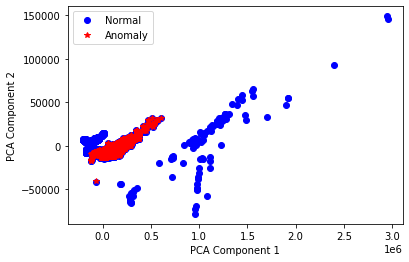

In [38]:
pca_run(X, y)

In [39]:
X = np.concatenate((vmdata[vmdata.columns[1:18]].values[0:8058-113],vmdata[vmdata.columns[1:18]].values[8058+5216:8058+7945]), axis=0)
y = np.concatenate((vmdata[vmdata.columns[18]].values[0:8058-113],vmdata[vmdata.columns[18]].values[8058+5216:8058+7945]), axis=0)

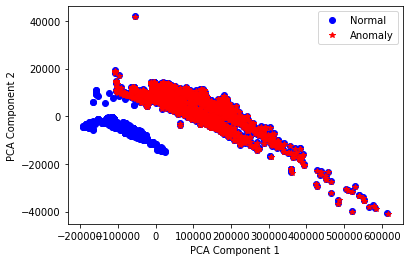

In [40]:
pca_run(X, y)

In [41]:
X = np.concatenate((vmdata[vmdata.columns[1:18]].values[0:8058-2842],vmdata[vmdata.columns[1:18]].values[8058:8058+5216]), axis=0)
y = np.concatenate((vmdata[vmdata.columns[18]].values[0:8058-2842],vmdata[vmdata.columns[18]].values[8058:8058+5216]), axis=0)

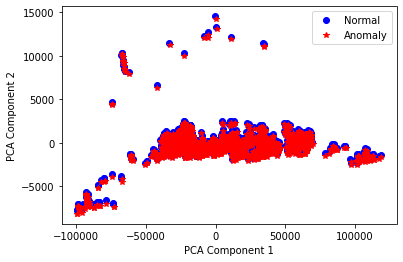

In [42]:
pca_run(X, y) 

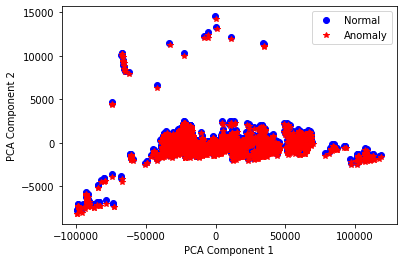

In [43]:
X1, y1 = pca_mle(X, y)

In [44]:
def limit_y(X, y, per):
    count = 0
    norm = []
    anom = []
    for i in y:
        if i == 0:
            norm.append(count)
        else:
            anom.append(count)
        count += 1
    rp = np.array(np.random.permutation(np.size(anom)))
    anom = np.array(anom)
    norm = np.array(norm)
    num = int((per/(1-per)) * len(norm))
    newy = np.concatenate((y[norm], y[anom[rp[0:num]]]))
    newX = np.concatenate((X[norm, :], X[anom[rp[0:num]], :]))
    return newX, newy

In [45]:
X_, y_ = limit_y(X1, y1, .10)

In [130]:
sum(y_)/len(y_)

0.0999137187230371

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state = 3)

In [132]:
sum(y_test)/len(y_test)

0.09663503019844694

In [133]:
def F1Calc(est_y, y):
    out = np.argwhere(y == -1)
    tp = sum(est_y[out] == y[out])
    anom = np.size(out);
    pos = sum((est_y == -1));
    rec = float(tp) / anom;
    try:
        prec = float(tp) / pos;
        F1 = (2 * prec * rec) / (prec + rec);
    except ZeroDivisionError:
        F1 = 0
    return F1


In [134]:
def print_stats(est_y, newy):
    compare = sum(est_y == newy)
    anom = np.argwhere(newy == -1);
    fanom = est_y[anom] == newy[anom];
    found = float(sum(fanom)) / np.size(anom) * 100;

    print('Accuracy:', float(compare) / np.size(newy) * 100)
    print('\nF1 Score:', F1Calc(est_y, newy))
    print('\nPercent Anomalies Found:', found)

In [ ]:
newy_test = cy(y_test)
newy = cy(y_)

In [84]:
#outlier detecter
clf = LocalOutlierFactor(n_neighbors = 1)
est_y = clf.fit_predict(X_)
print_stats(est_y, newy)

Accuracy: 76.72131147540983

F1 Score: 0.22158107328332374

Percent Anomalies Found: 33.160621761658035


In [85]:
#novelty detection
nov = LocalOutlierFactor(n_neighbors = 1, novelty = True)
nov.fit(X_train)
est_ytest = nov.predict(X_test)
print_stats(est_ytest, newy_test)

Accuracy: 75.40983606557377

F1 Score: 0.1971830985915493

Percent Anomalies Found: 31.25


In [86]:
#isolation forest
model = IsolationForest(n_estimators=61, max_samples=10,max_features=1)
model.fit(X_train)
est_ytest2 = model.predict(X_test)
print_stats(est_ytest2, newy_test)

Accuracy: 51.423641069887836

F1 Score: 0.18523878437047755

Percent Anomalies Found: 57.14285714285714


In [87]:
def calc_stats(acc, f1, p_anom, prec, est_y, ytest):
    compare = sum(est_y == ytest)
    anom = np.argwhere(ytest == -1);
    fanom = est_y[anom] == ytest[anom];
    anomm = np.argwhere(est_y == -1)
    found = float(sum(fanom)) / np.size(anom) * 100;
    try:
        precc = float(sum(fanom)) / np.size(anomm) * 100;
    except ZeroDivisionError:
        precc = 0
    

    acc[i] = float(compare) / np.size(ytest) * 100
    f1[i] = F1Calc(est_y, ytest)
    p_anom[i] = found
    prec[i] = precc
    return [acc, f1, p_anom, prec]
    

In [135]:
def plotvar(n_est, acc, p_anom, prec, f1, rtime, method, variable, showtime):
    f = plt.figure()
    name = variable + method + 'moffeat.png'
    plt.plot(n_est, acc,label = 'Accuracy')
    plt.plot(n_est, p_anom,label = 'Percent Anomalies')
    plt.plot(n_est, prec, label = 'Precision')
    plt.plot(n_est, f1*100, label = 'F1')
    ind = np.argmax(f1)
    plt.plot(n_est[ind],f1[ind]*100, '*', label = 'Highest F1 Score')
    plt.legend()
    plt.title(method)
    plt.xlabel(variable)
    plt.show()
    f.savefig(name, format = 'png', dpi = 1200)
    if showtime:
        plt.figure()
        plt.plot(n_est, rtime)
        plt.ylabel('Time (s)')
        plt.xlabel(variable)
        plt.title('Run Time')
        plt.show()

In [136]:
m = 100
n_est3 = np.linspace(1, 100, m)
acc3 = np.zeros(m)
f13 = np.zeros(m)
p_anom3 = np.zeros(m)
time3 = np.zeros(m)
prec3 = np.zeros(m)
for i in range(m):
    start = timeit.default_timer()
    nov = LocalOutlierFactor(n_neighbors = int(n_est3[i]), novelty = True)
    nov.fit(X_train)
    est_ytest = nov.predict(X_test)
    stop = timeit.default_timer()
    
    [acc3, f13, p_anom3, prec3] = calc_stats(acc3, f13, p_anom3, prec3, est_ytest, newy_test)
    time3[i] = stop - start
   

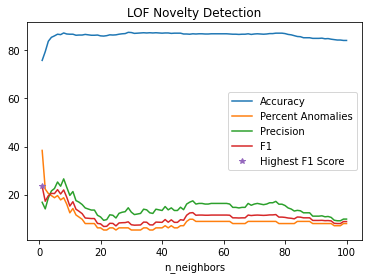

0.2343324250681199
1.0


In [137]:
plotvar(n_est3, acc3, p_anom3, prec3, f13, time3, 'LOF Novelty Detection', 'n_neighbors',0)
ind = np.argmax(f13)
print(max(f13))
print(n_est3[ind])

In [138]:
m = 100
n_est1 = np.linspace(10, 4000, m)
acc1 = np.zeros(m)
f11 = np.zeros(m)
p_anom1 = np.zeros(m)
rtime1 = np.zeros(m)
prec1 = np.zeros(m)
for i in range(m):
    start = timeit.default_timer()
    model = IsolationForest(n_estimators = int(n_est1[i]), max_samples=10,max_features=6)
    model.fit(X_train)
    est_ytest2 = model.predict(X_test)
    stop = timeit.default_timer()
    
    [acc1, f11, p_anom1, prec1] = calc_stats(acc1, f11, p_anom1, prec1, est_ytest2, newy_test)
    rtime1[i] = stop - start

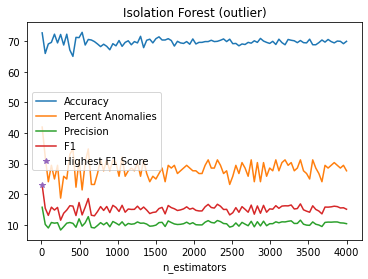

0.22926829268292684


10.0

In [139]:
plotvar(n_est1, acc1, p_anom1, prec1, f11, rtime1, 'Isolation Forest (outlier)', 'n_estimators',0)
ind = np.argmax(f11)
print(f11[ind])
n_est1[ind]

In [140]:
m = 100
n_est_ = np.linspace(2, 102, m)
acc_ = np.zeros(m)
f1_ = np.zeros(m)
p_anom_ = np.zeros(m)
rtime_ = np.zeros(m)
prec_ = np.zeros(m)
for i in range(m):
    start = timeit.default_timer()
    model = IsolationForest(n_estimators = 27, max_samples=int(n_est_[i]),max_features=6)
    model.fit(X_train)
    est_ytest2 = model.predict(X_test)
    stop = timeit.default_timer()
    
    [acc_, f1_, p_anom_, prec_] = calc_stats(acc_, f1_, p_anom_, prec_, est_ytest2, newy_test)
    rtime_[i] = stop - start

<ipython-input-133-38002fa99a67>:8: RuntimeWarning: invalid value encountered in true_divide
  prec = float(tp) / pos;
<ipython-input-133-38002fa99a67>:8: RuntimeWarning: invalid value encountered in true_divide
  prec = float(tp) / pos;
<ipython-input-133-38002fa99a67>:9: RuntimeWarning: invalid value encountered in double_scalars
  F1 = (2 * prec * rec) / (prec + rec);


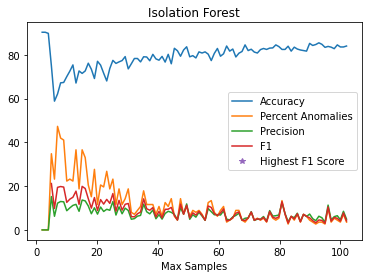

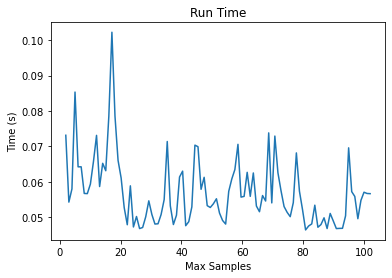

nan


2.0

In [141]:
plotvar(n_est_, acc_, p_anom_, prec_, f1_, rtime_, 'Isolation Forest', 'Max Samples',1)
ind = np.argmax(f1_)
print(f1_[ind])
n_est_[ind]

In [142]:
m = 100
n_est2 = np.linspace(1, 100, m)
acc2 = np.zeros(m)
f12 = np.zeros(m)
p_anom2 = np.zeros(m)
time2 = np.zeros(m)
prec2 = np.zeros(m)
for i in range(m):
    start = timeit.default_timer()
    clf = LocalOutlierFactor(n_neighbors = int(n_est2[i]))
    est_y = clf.fit_predict(X_)
    stop = timeit.default_timer()
    
    [acc2, f12, p_anom2, prec2] = calc_stats(acc2, f12, p_anom2, prec2, est_y, newy)
    time2[i] = stop - start
    

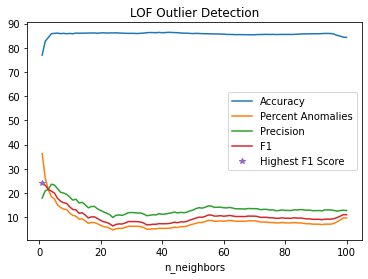

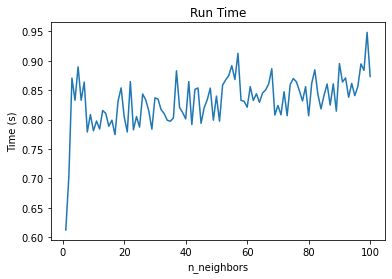

0.23972602739726026
1.0


In [143]:
plotvar(n_est2, acc2, p_anom2, prec2, f12, time2, 'LOF Outlier Detection', 'n_neighbors',1)
ind = np.argmax(f12)
print(max(f12))
print(n_est2[ind])

In [144]:
m = 100
n_est1 = np.linspace(10, 4000, m)
acc1 = np.zeros(m)
f11 = np.zeros(m)
p_anom1 = np.zeros(m)
rtime1 = np.zeros(m)
prec1 = np.zeros(m)
for i in range(m):
    start = timeit.default_timer()
    model = IsolationForest(n_estimators = 10, max_samples=10,max_features=6)
    model.fit(X_train)
    est_ytest2 = model.predict(X_test)
    stop = timeit.default_timer()
    
    [acc1, f11, p_anom1, prec1] = calc_stats(acc1, f11, p_anom1, prec1, est_ytest2, newy_test)
    rtime1[i] = stop - start

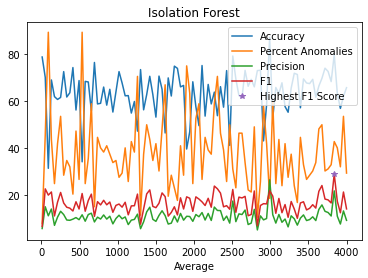

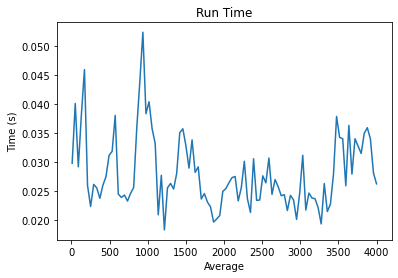

Highest F1 score recorded: 0.2900302114803625
Average F1 score: 0.16599892160879562
Standard Deviation: 0.03867156107213705


In [145]:
plotvar(n_est1, acc1, p_anom1, prec1, f11, rtime1, 'Isolation Forest', 'Average',1)
ind = np.argmax(f11)
print('Highest F1 score recorded:',f11[ind])
print('Average F1 score:',np.mean(f11))
print('Standard Deviation:',np.std(f11))